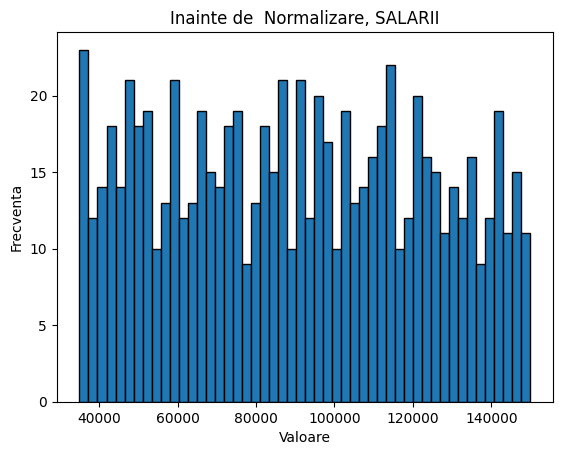

In [39]:
#4)Sa se normalizeze informatiile de la problema 1 si 2 folosind diferite metode de normalizare astfel:
#a)problema 1 - salariul, bonusul, echipa

#1) salariu

import pandas as pd
import matplotlib.pyplot as plt
from math import log, sqrt
employees = pd.read_csv('D:\\\\FACULTATE\\\\SEM4\\\\AI\\\\Lab2\\\\employees.csv')
fisier_employees_complet = employees.dropna()
salarii = fisier_employees_complet['Salary']

plt.hist(salarii, bins = 50,edgecolor='black')  
plt.xlabel('Valoare')
plt.ylabel('Frecventa')
plt.title('Inainte de  Normalizare, SALARII')
plt.show()

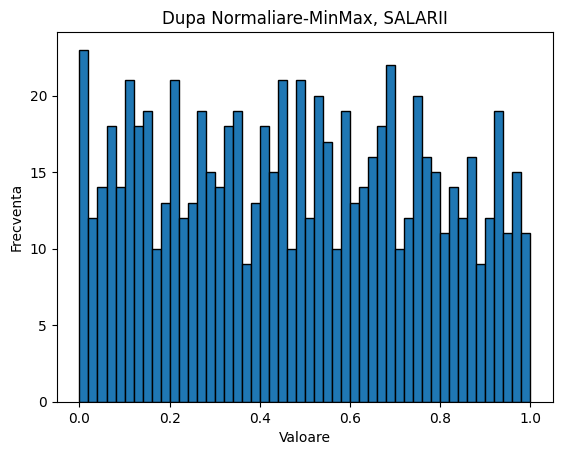

In [156]:
# -min-max scalling
salarii_scaled01 = [(s - min(salarii)) / (max(salarii) - min(salarii)) for s in salarii]

# - log-scaling
salarii_log = [log(s) for s in salarii]

plt.hist(salarii_scaled01, bins = 50,edgecolor='black')  

plt.xlabel('Valoare')
plt.ylabel('Frecventa')
plt.title('Dupa Normaliare-MinMax, SALARII')
plt.show()

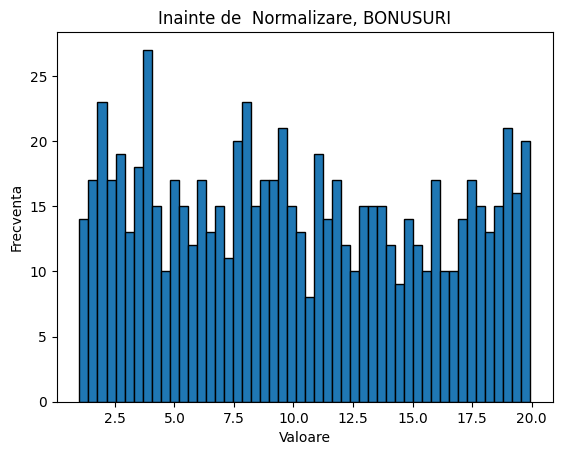

In [3]:
#2) bonusuri
bonusuri = fisier_employees_complet['Bonus %']

plt.hist(bonusuri, bins = 50,edgecolor='black')  
plt.xlabel('Valoare')
plt.ylabel('Frecventa')
plt.title('Inainte de  Normalizare, BONUSURI')
plt.show()

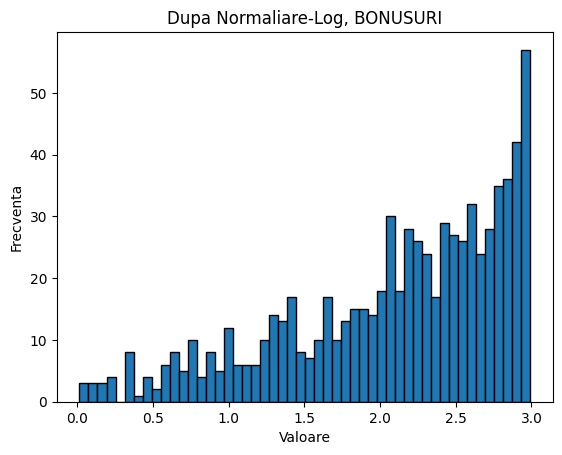

In [157]:
# -min-max scalling
bonusuri_scaled01 = [(s - min(bonusuri)) / (max(bonusuri) - min(bonusuri)) for s in bonusuri]

# - log-scaling
bonusuri_log = [log(s) for s in bonusuri]

plt.hist(bonusuri_log, bins = 50,edgecolor='black')  
plt.xlabel('Valoare')
plt.ylabel('Frecventa')
plt.title('Dupa Normaliare-Log, BONUSURI')
plt.show()

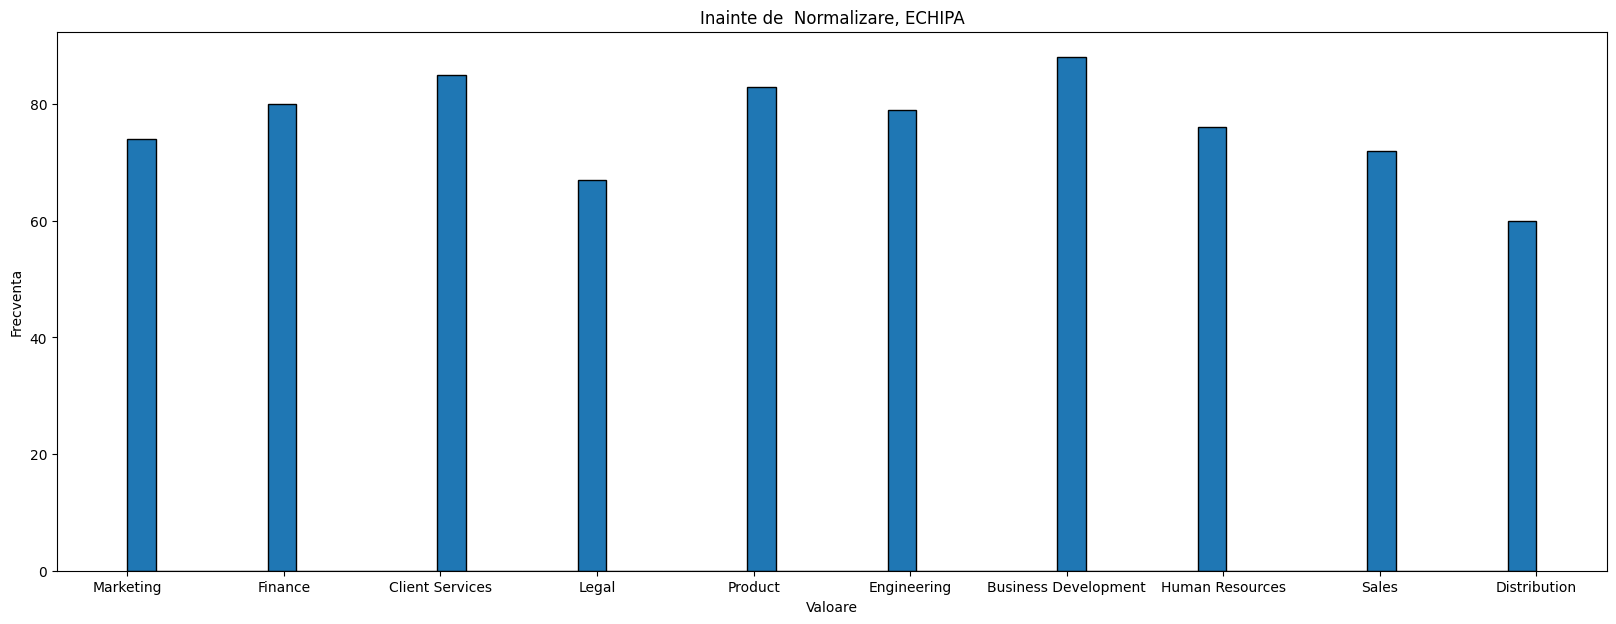

In [5]:
#3) echipa
team = fisier_employees_complet['Team']

plt.figure(figsize=(20, 7))
plt.hist(team, bins = 50,edgecolor='black')  
plt.xlabel('Valoare')
plt.ylabel('Frecventa')
plt.title('Inainte de  Normalizare, ECHIPA')
plt.show()

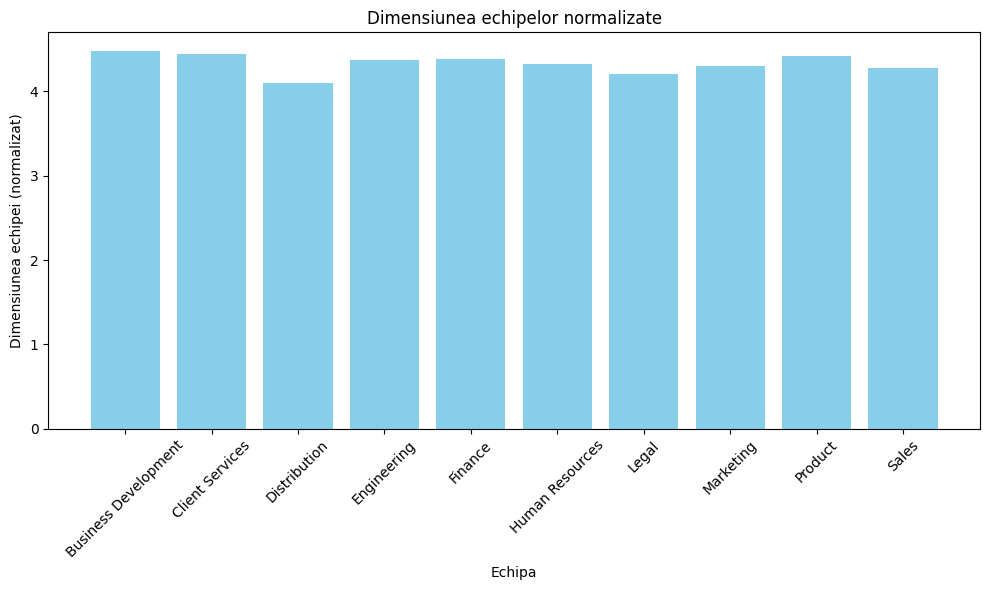

In [158]:
#impartirea angajatilor pe echipe
team_g = fisier_employees_complet.groupby("Team")
teams = [team_g.get_group(x) for x in team_g.groups]
teams = team_size.index.tolist()
#cati angajati sunt / echipa
team_g = fisier_employees_complet.groupby("Team")
team_size = team_g.size()

team_sizes_normalized = [log(size) for size in team_size.values]

plt.figure(figsize=(10, 6))
plt.bar(teams, team_sizes_normalized, color='skyblue')
plt.xlabel('Echipa')
plt.ylabel('Dimensiunea echipei (normalizat)')
plt.title('Dimensiunea echipelor normalizate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

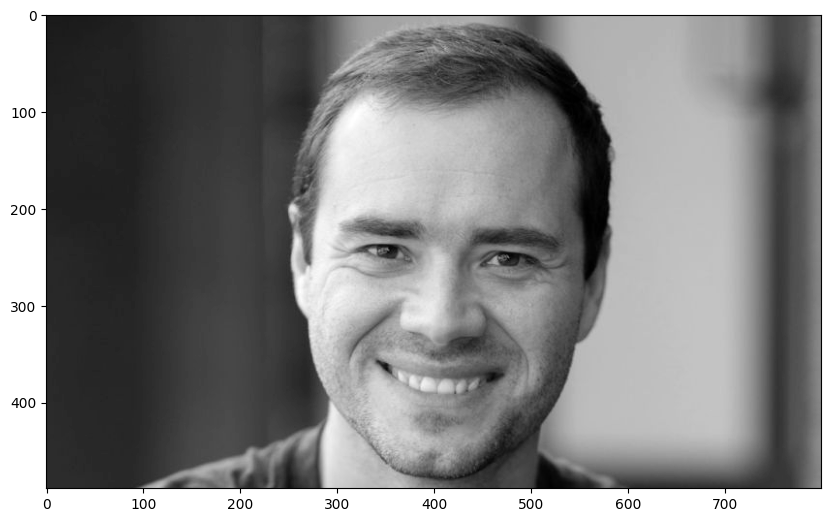

In [164]:
#b)problema 2 - valorile pixelilor din imagini
from PIL import Image
import matplotlib.image as mpimg
img6 = Image.open('D:\\\\FACULTATE\\\\SEM4\\\\AI\\\\Lab2\\\\imgs\\\\Karpaty.jpg')
fig, axs = plt.subplots(1, 1, figsize=(10, 9))
imgGri6 = img6.convert('L')
axs.imshow(imgGri6,cmap='grey') #nu arata chiar asa, dar ii face ceva plot-ul
#imgGri6.show() #-> ca sa se vada mai vine acel gri :) 
plt.show()

391200


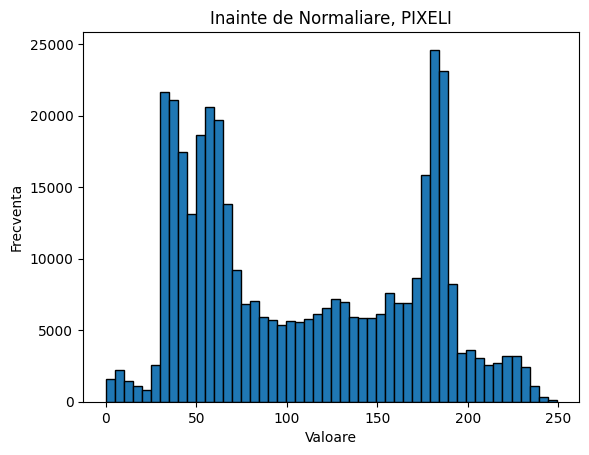

In [54]:
from math import log, sqrt

valori_pixeli = []

if imgGri6 is not None:
    pixel_access = imgGri6.load()
    width, height = imgGri6.size

    for y in range(height):
        for x in range(width):
            pixel_value = pixel_access[x, y]    
            valori_pixeli.append(pixel_value)
else:
    print("Imaginea nu a fost încărcată corect.")

print(len(valori_pixeli))

plt.hist(valori_pixeli, bins = 50,edgecolor='black')  
plt.xlabel('Valoare')
plt.ylabel('Frecventa')
plt.title('Inainte de Normaliare, PIXELI')
plt.show()

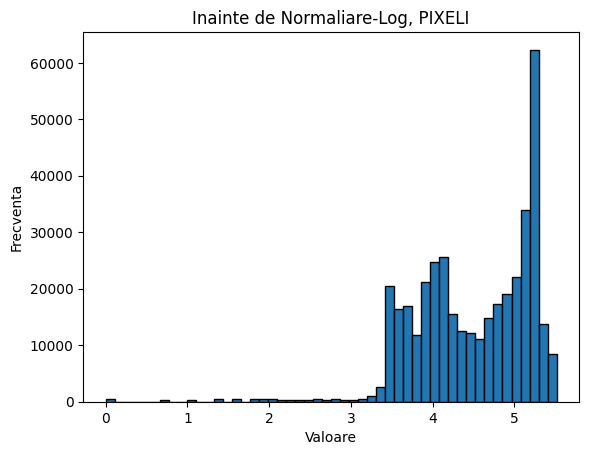

In [159]:
# -1 1 sau 0 1
# in 0-1 /255
valori_pixeli_log = []
for s in valori_pixeli:
    if s > 0:
        valori_pixeli_log.append(log(s))
    else:
        valori_pixeli_log.append(0)
        
plt.hist(valori_pixeli_log, bins = 50,edgecolor='black')  
plt.xlabel('Valoare')
plt.ylabel('Frecventa')
plt.title('Inainte de Normaliare-Log, PIXELI')
plt.show()       

In [62]:
#pentru afisarea imaginii dupa normalizare :) 
import numpy as np
output_image = Image.fromarray(np.uint8(valori_pixeli_log))
output_image.show() 

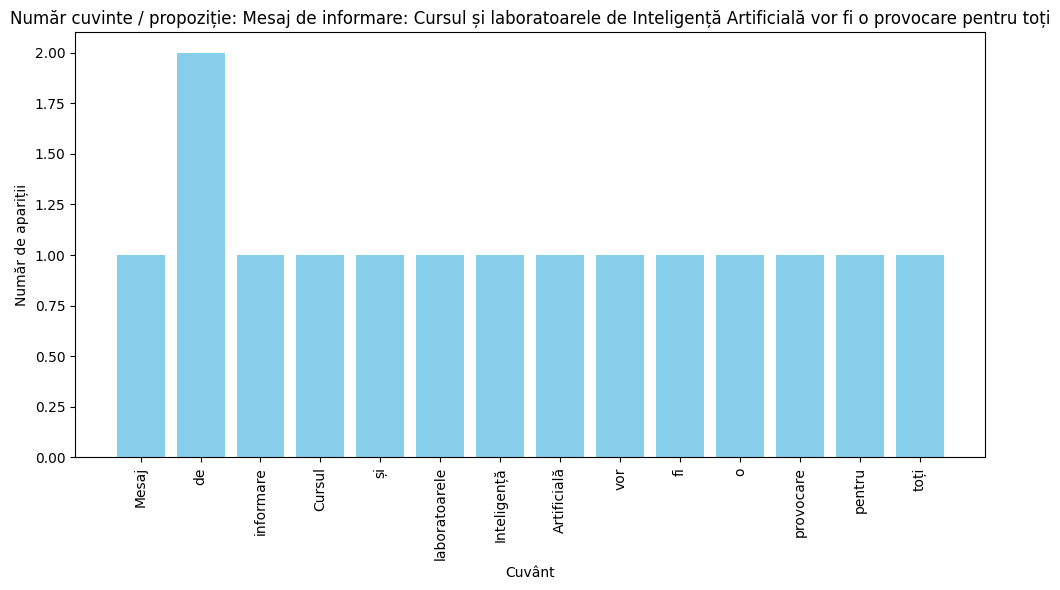

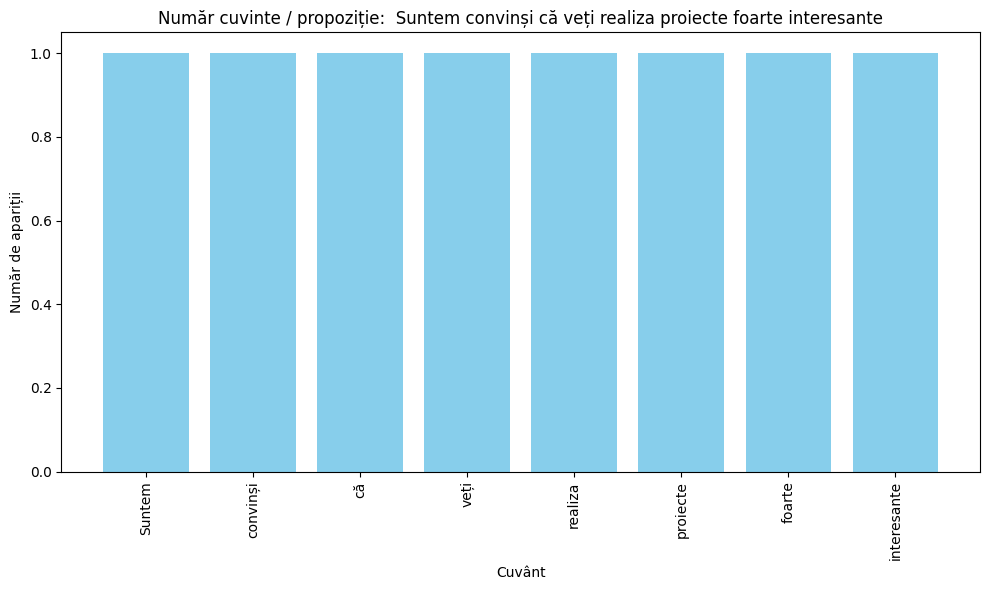

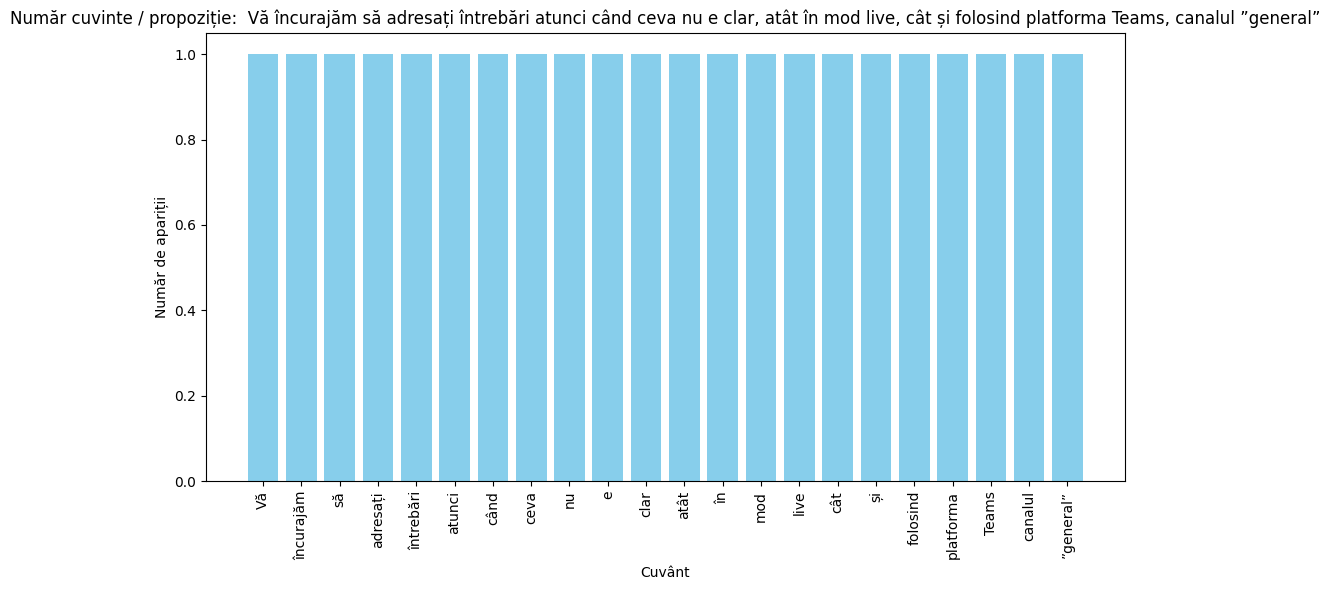

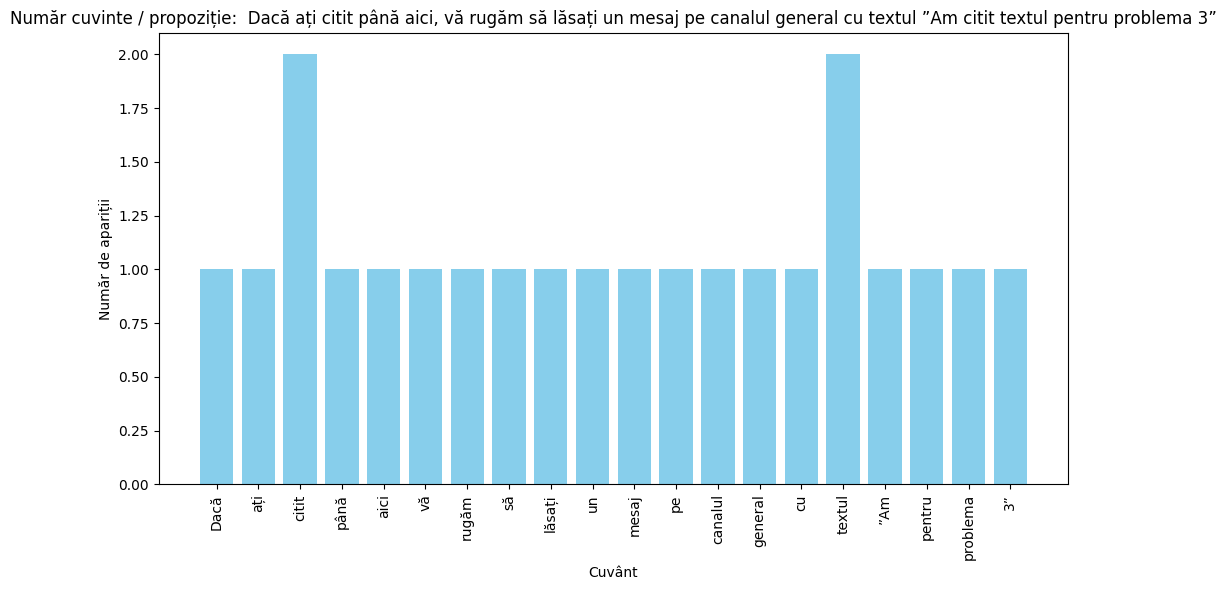

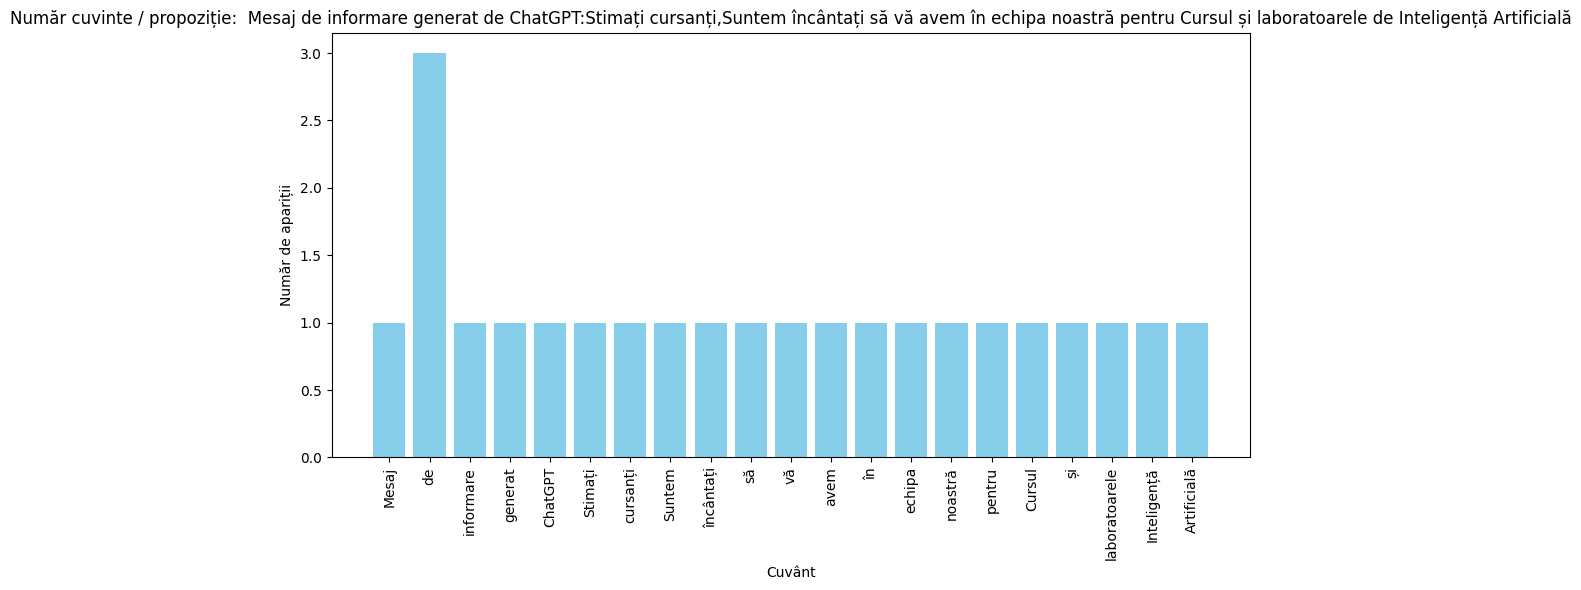

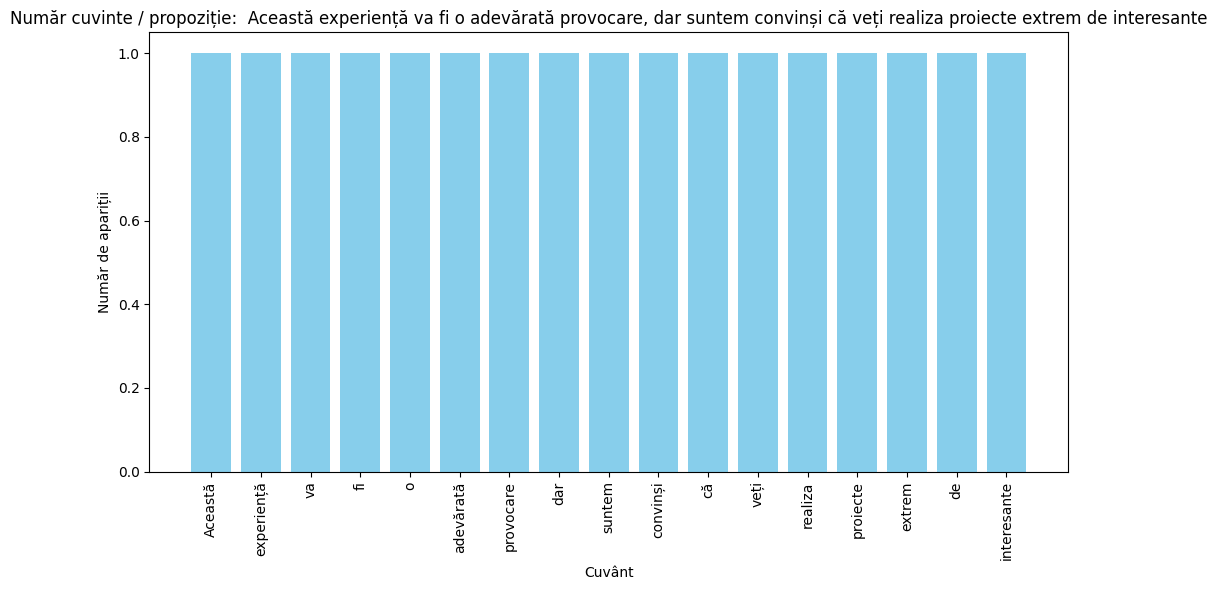

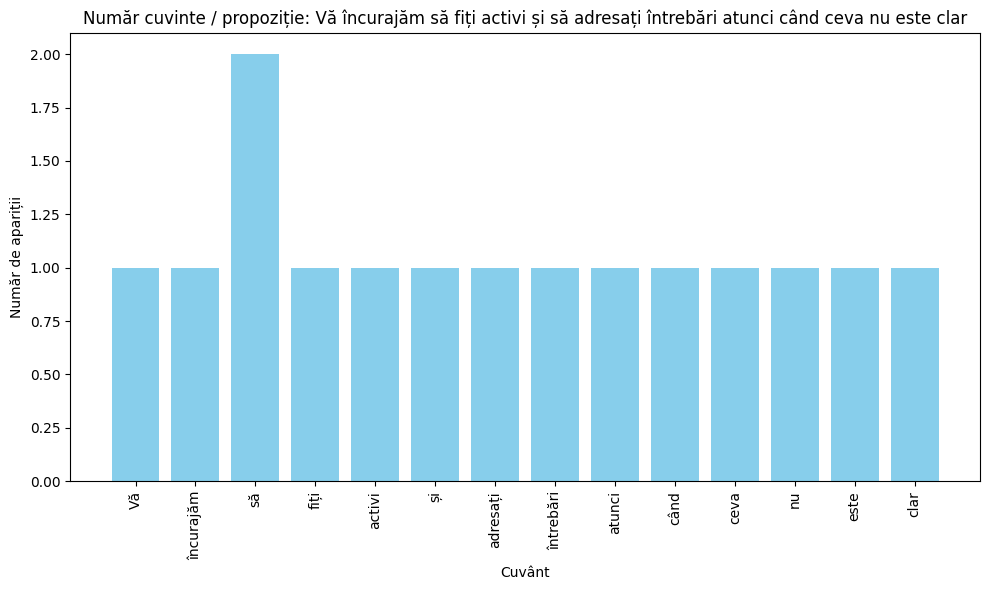

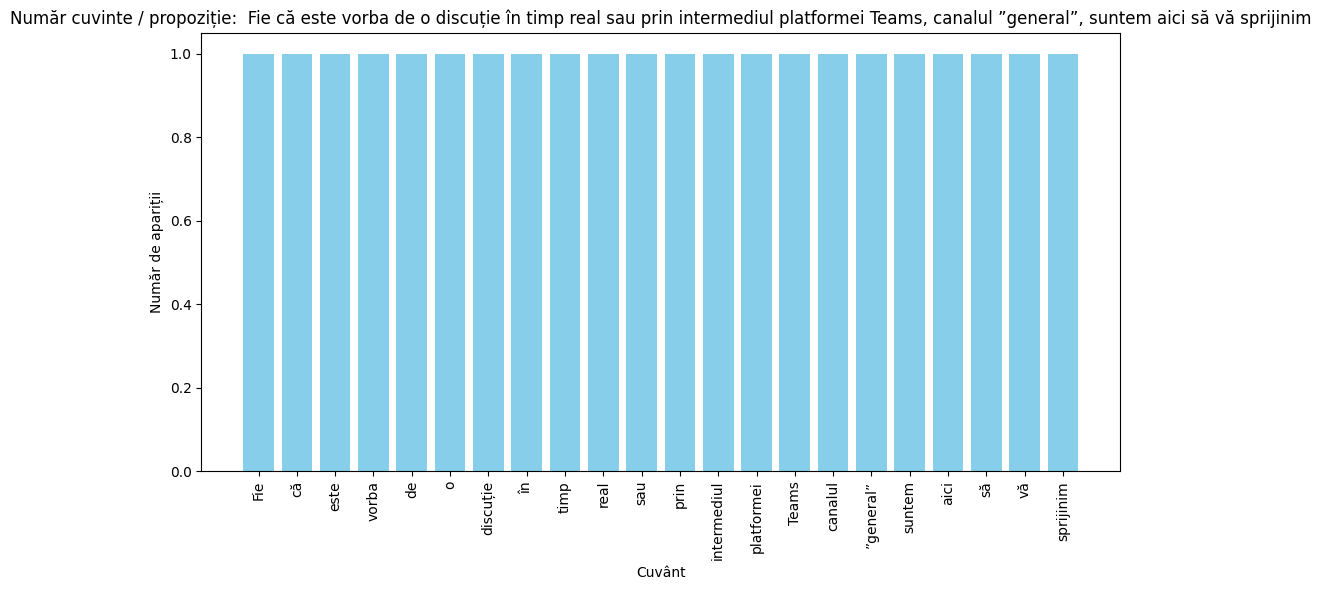

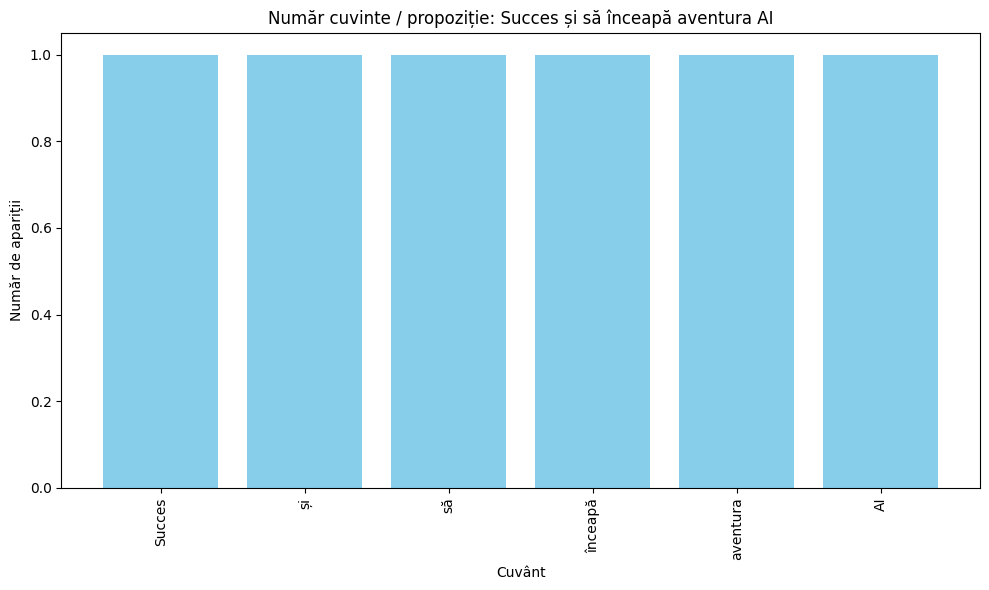

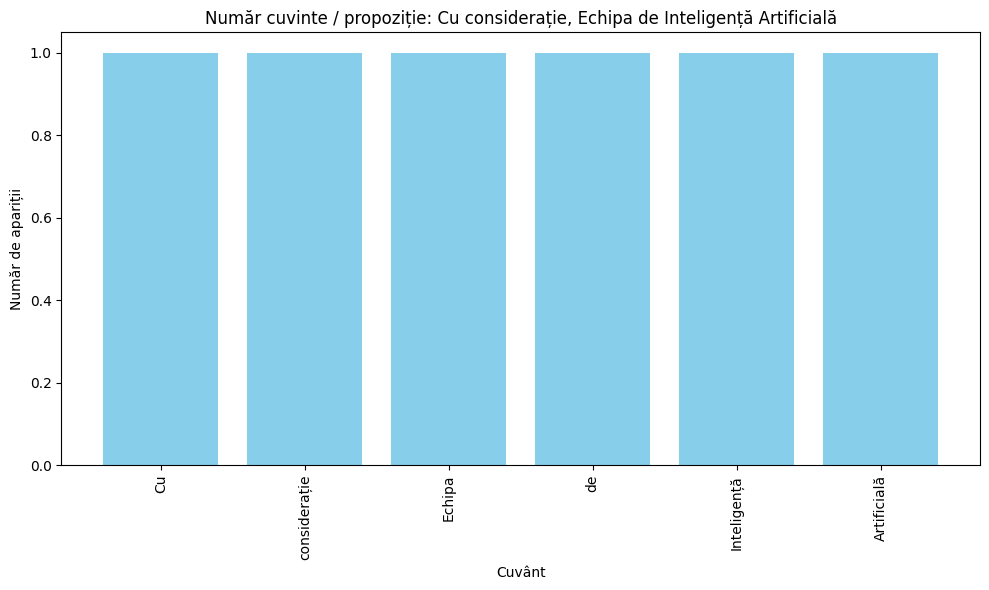

In [128]:
#c)problema 3 - numarul de aparitii a cuvintelor la nivelul unei propozitii.
import re
import matplotlib.pyplot as plt
from collections import defaultdict

file_path = 'D:\\\\FACULTATE\\\\SEM4\\\\AI\\\\Lab2\\\\texts.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    fisier = file.read()

#extrag propozitiile
text_fara_newline = fisier.replace("\n", "")
punctuatii = re.compile(r'[.!?]')
propozitii = punctuatii.split(text_fara_newline)

#print(len(propozitii))
#print(propozitii)

#nr cuvinte
separatori = re.compile(r'[, .!?:"]')
cuvinte = separatori.split(text_fara_newline)
rezultat = []
for c in cuvinte:
    if c != "":
        rezultat.append(c)
        
# print(len(rezultat))
# print(rezultat)
impartire = defaultdict(list)
aparitii_cuvinte = defaultdict(int)
for prop in propozitii:
    cuv = separatori.split(prop)
    cuv_final = []
    for c in cuv:
        if c != "":
            cuv_final.append(c)
    for c in cuv_final:
        aparitii_cuvinte[(prop, c)] += 1
        impartire[prop].append(c)
    cuv_final.clear()

# print(impartire)
# cuvinte = list(aparitii_cuvinte.keys())
# numar_aparitii = list(aparitii_cuvinte.values())

for propozitie, cuvinte in impartire.items():
    cuvinte_propozitie = list(cuvinte) 
    numar_aparitii = [aparitii_cuvinte[(propozitie, cuvant)] for cuvant in cuvinte_propozitie]
    
    # Desenăm histograma pentru propoziția curentă
    plt.figure(figsize=(10, 6))
    plt.bar(cuvinte_propozitie, numar_aparitii, color='skyblue')
    plt.xlabel('Cuvânt')
    plt.ylabel('Număr de apariții')
    plt.title(f'Număr cuvinte / propoziție: {propozitie}')
    plt.xticks(rotation=90)  
    plt.tight_layout()  
    plt.show()


{'provocare', 'vor', 'de', 'pentru', 'fi', 'Cursul', 'informare', 'o', 'și', 'Artificială', 'Mesaj', 'Inteligență', 'laboratoarele', 'toți'}


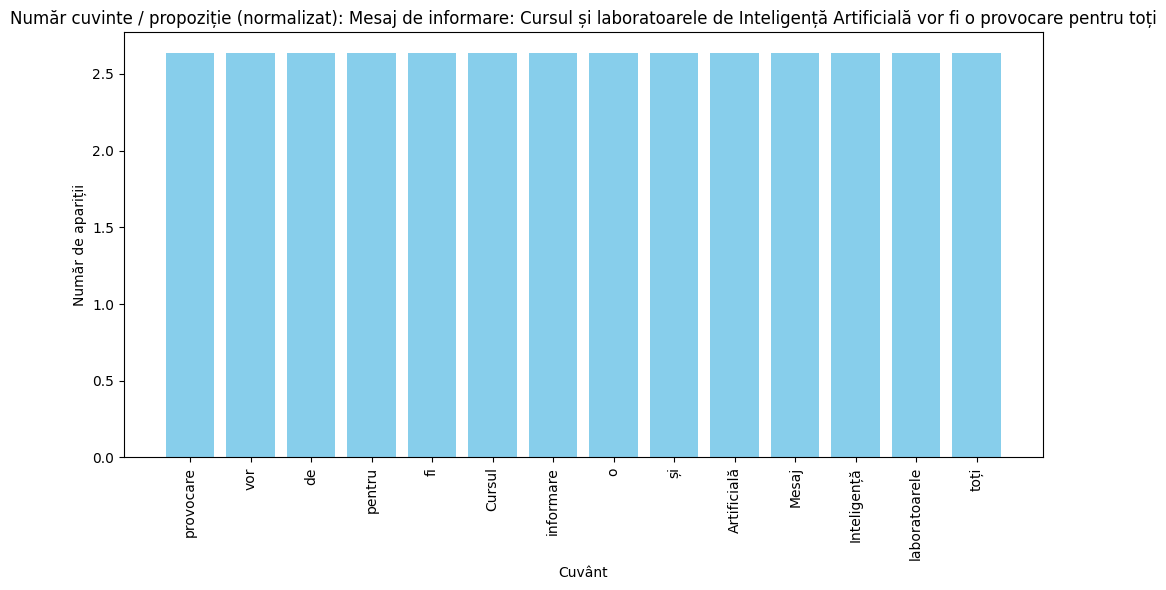

{'că', 'convinși', 'foarte', 'realiza', 'proiecte', 'veți', 'interesante', 'Suntem'}


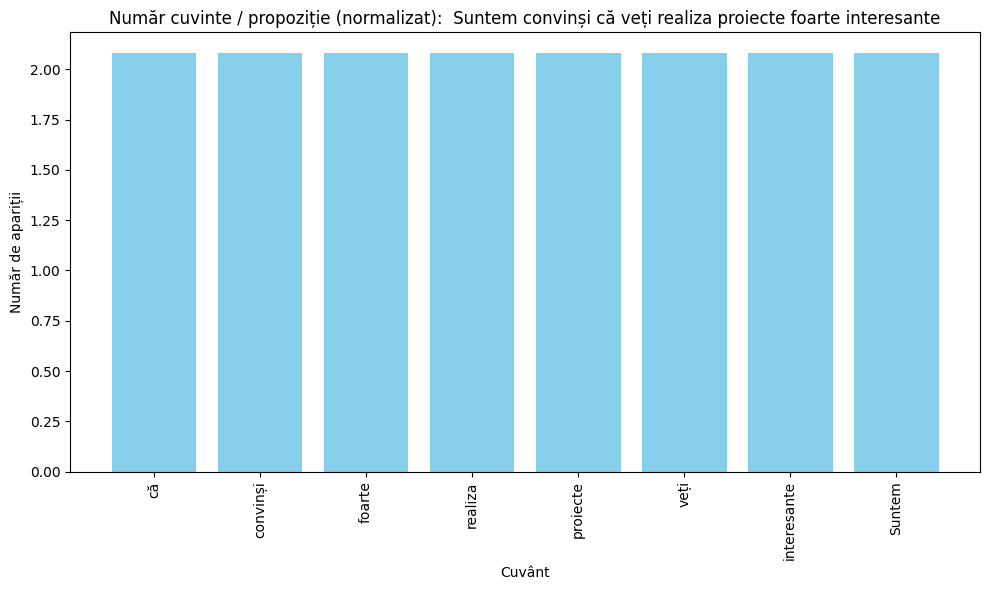

{'folosind', 'în', 'Vă', 'întrebări', 'încurajăm', 'nu', 'e', 'live', 'să', 'Teams', 'clar', 'și', 'cât', 'ceva', 'atât', '”general”', 'când', 'atunci', 'canalul', 'platforma', 'mod', 'adresați'}


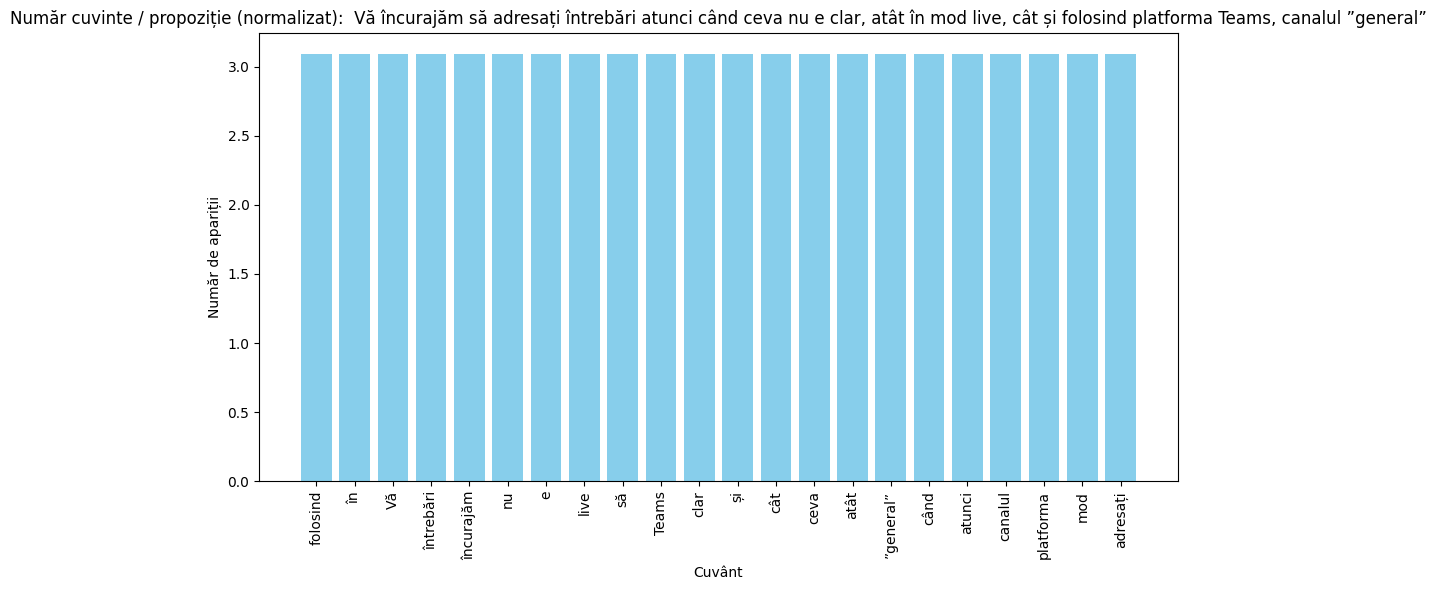

{'textul', '3”', 'vă', 'cu', 'citit', 'problema', 'să', 'mesaj', 'până', 'aici', 'un', 'pentru', 'rugăm', 'ați', 'general', 'canalul', '”Am', 'pe', 'Dacă', 'lăsați'}


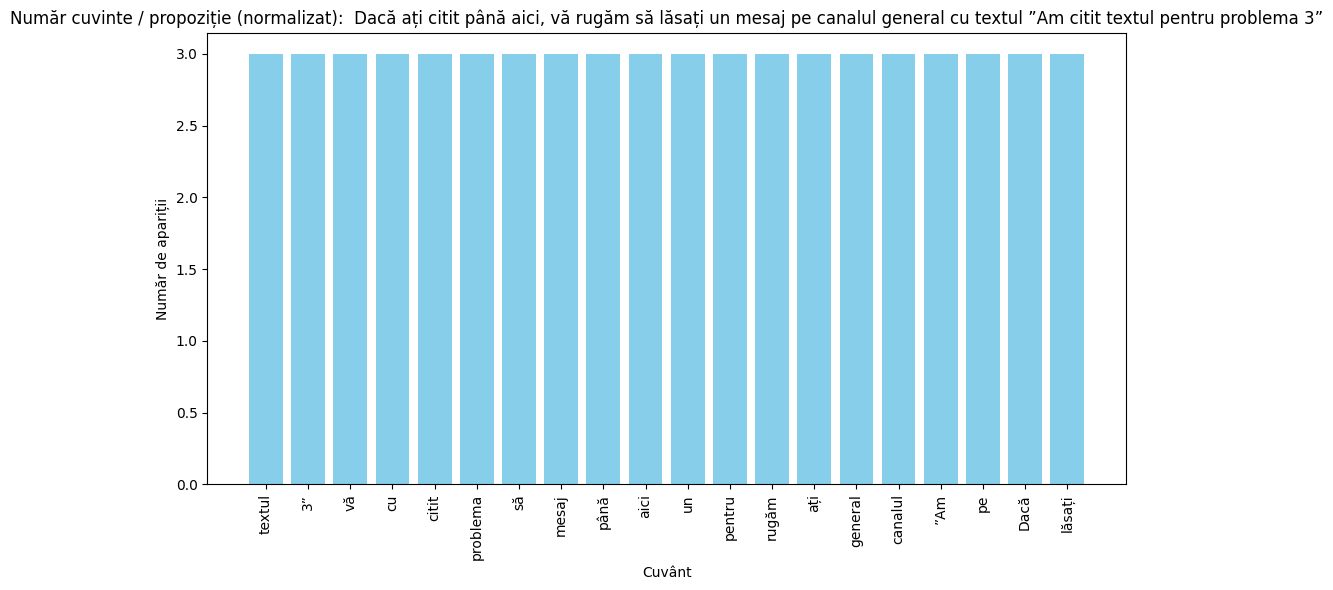

{'vă', 'în', 'Inteligență', 'Suntem', 'noastră', 'să', 'și', 'echipa', 'pentru', 'generat', 'Artificială', 'cursanți', 'laboratoarele', 'ChatGPT', 'avem', 'de', 'Cursul', 'Stimați', 'informare', 'Mesaj', 'încântați'}


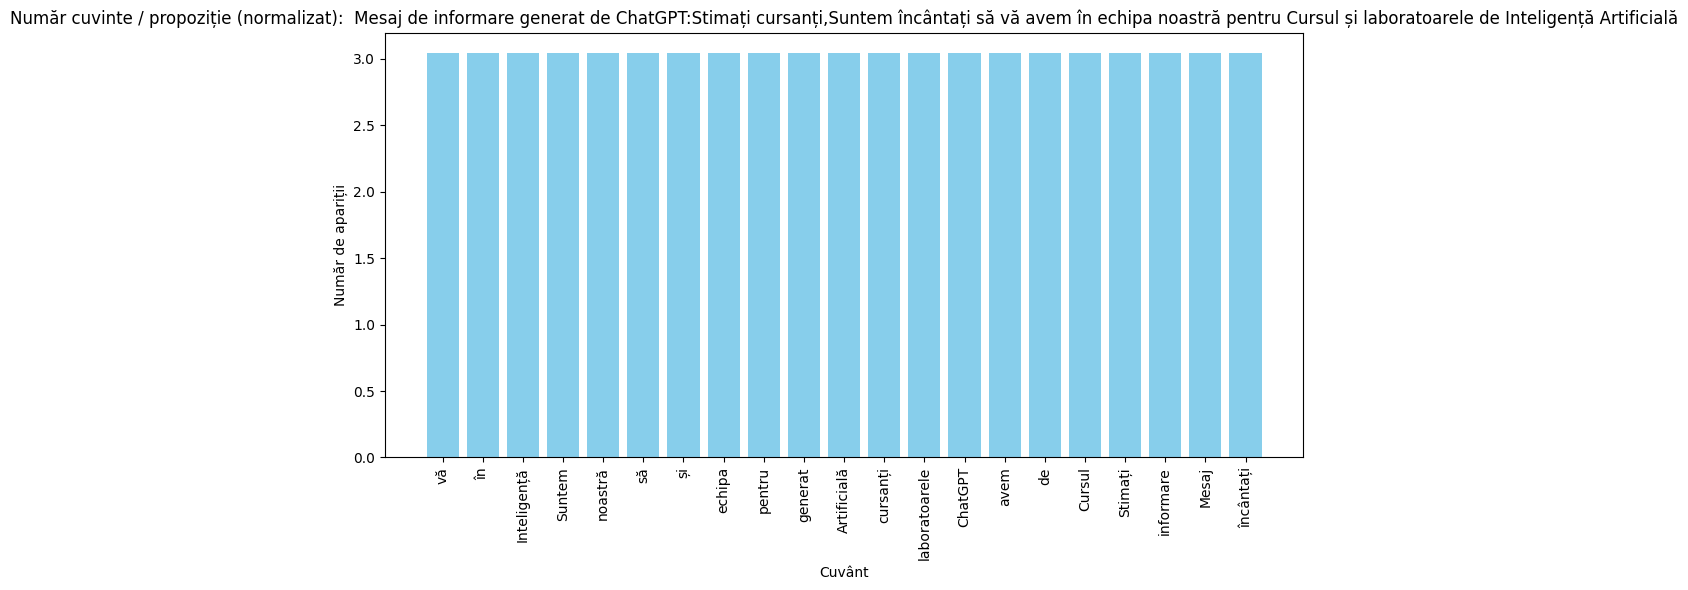

{'suntem', 'experiență', 'că', 'provocare', 'extrem', 'convinși', 'realiza', 'de', 'dar', 'proiecte', 'Această', 'veți', 'o', 'fi', 'interesante', 'adevărată', 'va'}


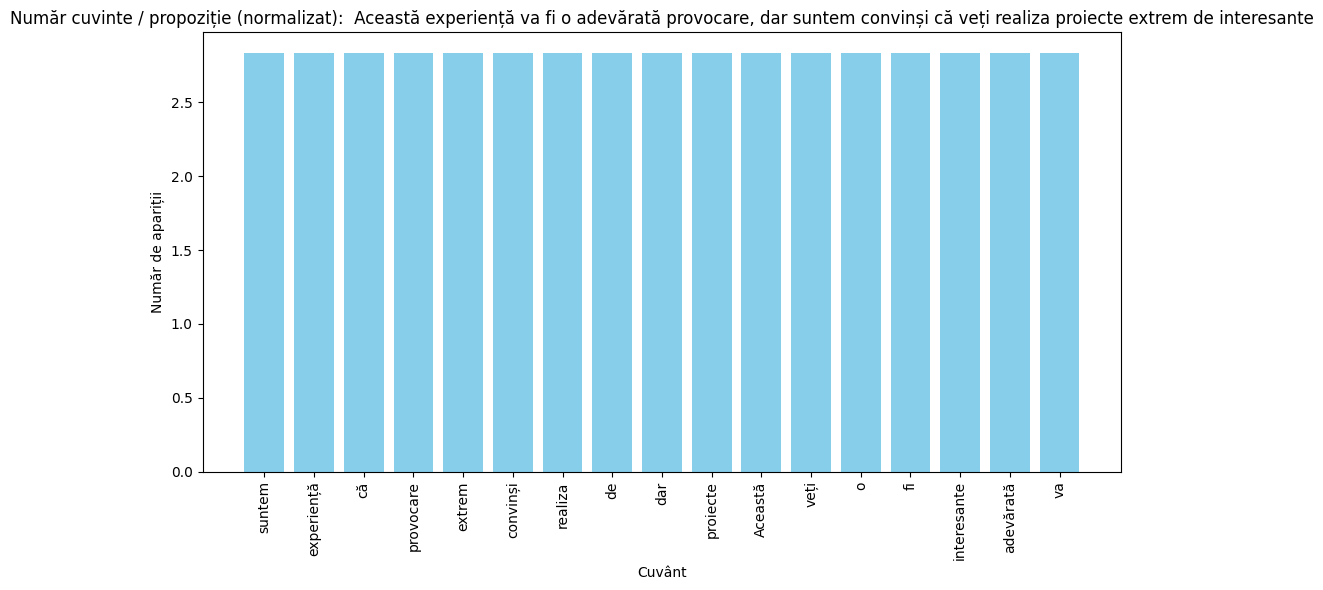

{'fiți', 'când', 'este', 'să', 'atunci', 'Vă', 'întrebări', 'încurajăm', 'clar', 'și', 'ceva', 'nu', 'adresați', 'activi'}


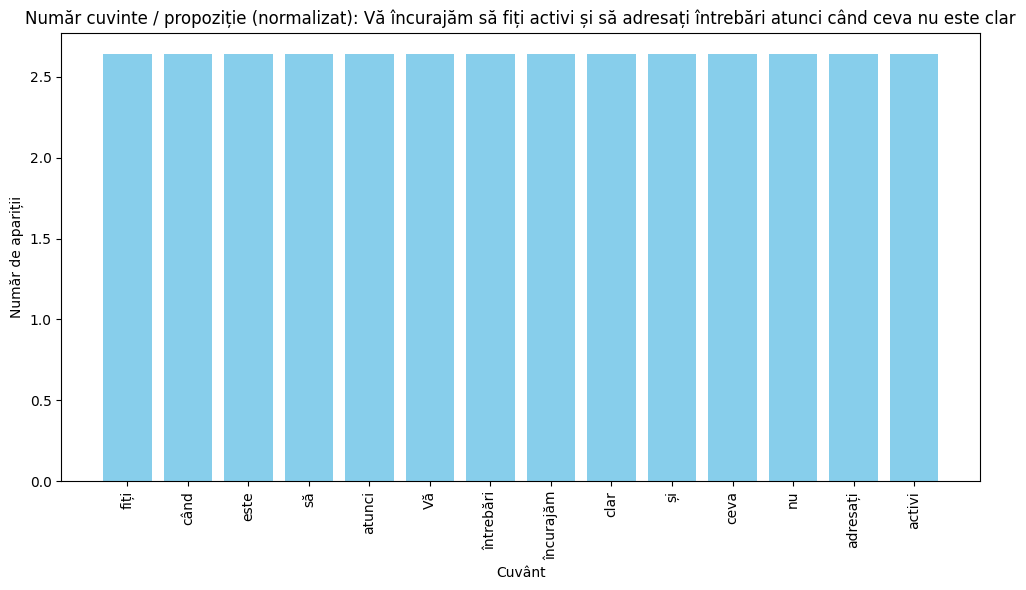

{'suntem', 'prin', 'real', 'este', 'sprijinim', 'vă', 'în', 'Fie', 'să', 'Teams', 'aici', 'sau', 'discuție', 'timp', 'o', 'vorba', '”general”', 'că', 'de', 'intermediul', 'platformei', 'canalul'}


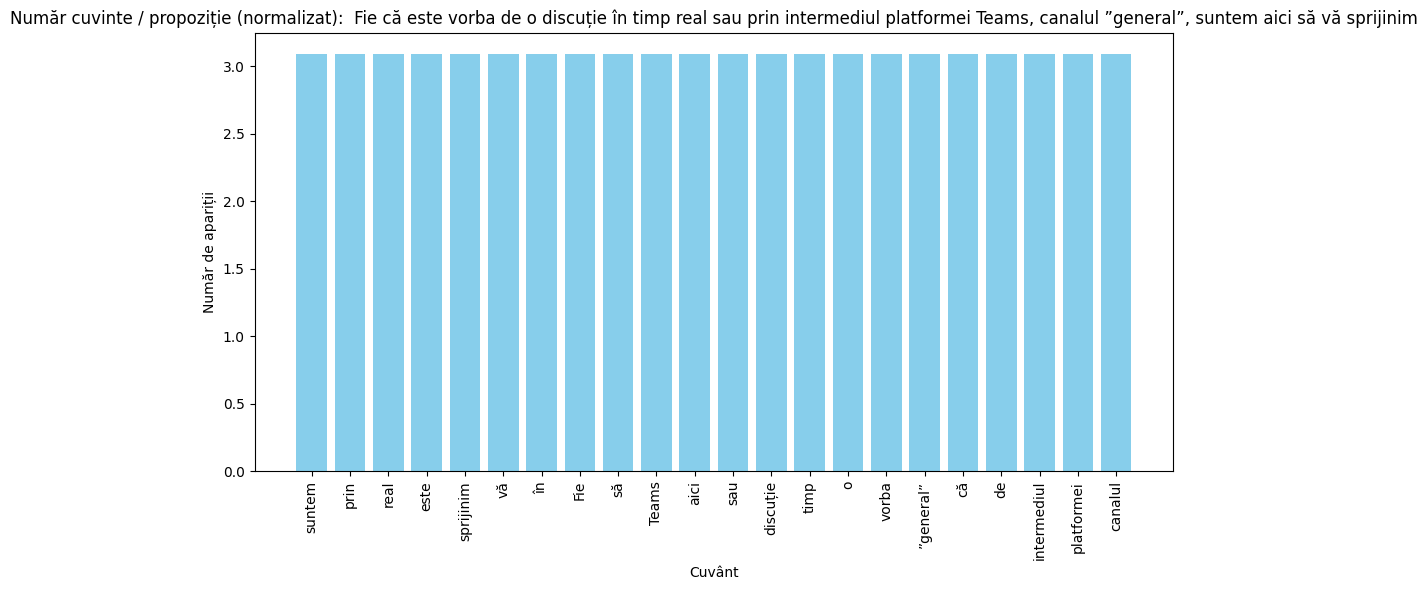

{'Succes', 'să', 'AI', 'aventura', 'înceapă', 'și'}


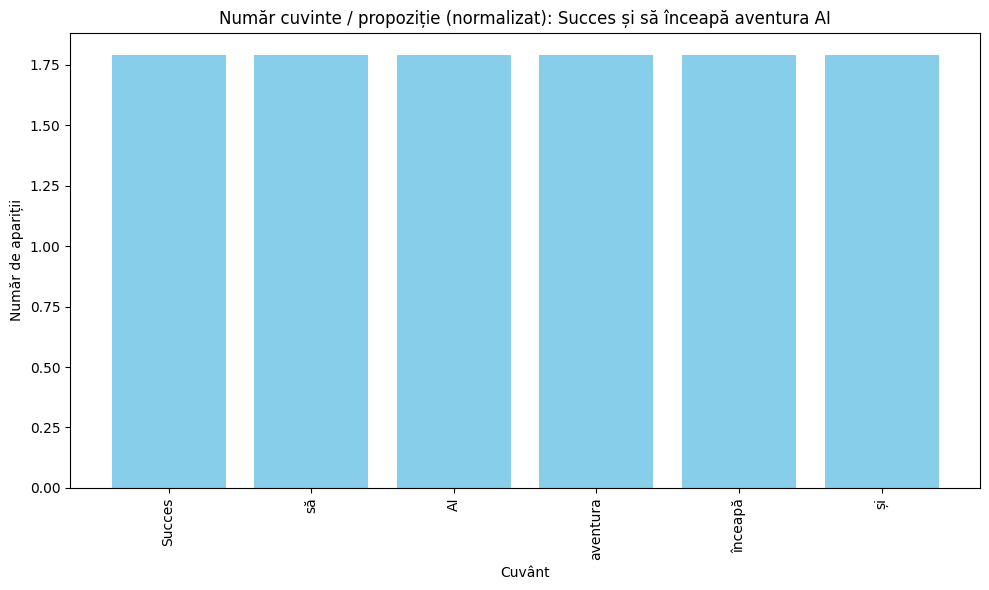

{'considerație', 'de', 'Cu', 'Artificială', 'Echipa', 'Inteligență'}


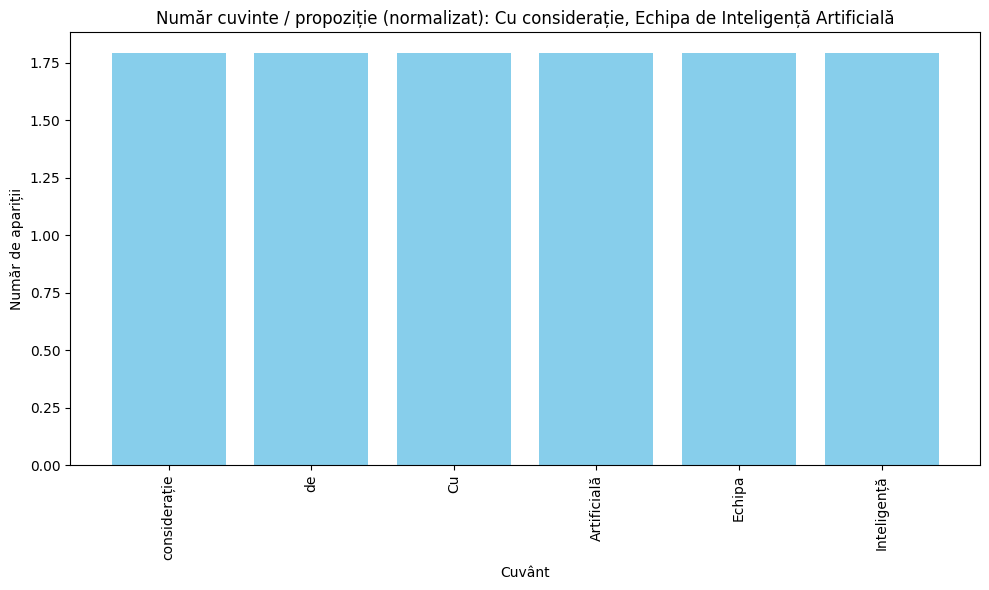

In [163]:
for propozitie, cuvinte in impartire.items():
    cuvinte_propozitie_unice = set(cuvinte)
    
    print(cuvinte_propozitie_unice)
    
    aparitii_cuvinte_normalizat = defaultdict(int)

    for cuvant in cuvinte_propozitie_unice:
        aparitii_cuvinte_normalizat[cuvant] = log(len(cuvinte_propozitie_unice))  
    # Desenăm histograma pentru propoziția curentă folosind cuvintele normalizate
    plt.figure(figsize=(10, 6))
    plt.bar(aparitii_cuvinte_normalizat.keys(), aparitii_cuvinte_normalizat.values(), color='skyblue')
    plt.xlabel('Cuvânt')
    plt.ylabel('Număr de apariții')
    plt.title(f'Număr cuvinte / propoziție (normalizat): {propozitie}')
    plt.xticks(rotation=90)  
    plt.tight_layout()  
    plt.show()